In [1]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

## example of overfitting

we generate 12 data points from the function 

sin(2$\pi$x),    

where $x\in[0,1]$, while adding a Gaussian noise, $\epsilon\sim {\cal N}(0,0.3)$

In [30]:
N = 12 # number of points                                                                                                                                                                                   
def func(x):
    return math.sin(2*np.pi*x)

xmin = 0
xmax = 1.
np.random.seed(1231) #1231
x = np.random.rand(N)
yclean = []
for i in range(N):
    yclean.append(func(x[i]) )

mu=0.
sigma=0.3
noise = st.norm.rvs(mu, sigma, size = N)
y = yclean + noise

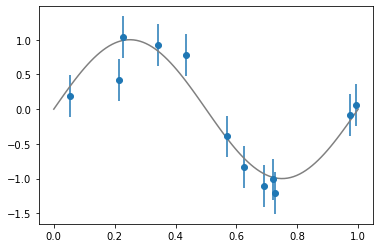

In [31]:
func_arr=[]
xs=np.linspace(0,1,100)
for xi in xs:
    func_arr.append(func(xi))

plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.show()

we use a polynomial model, where the prediction is: 

$f(x,{\vec w}) = {\vec w}^T \cdot \vec\phi(x) $,

where   $\vec\phi(x)=\{1,x,x^2,...,x^M\}^T$, with $M$ the order of the polynomial


In [4]:
def pred(x,w):
    '''
    x: vector of 1-D inputs
    w: vector of weights, dimension M+1 
    '''
    Mp1=len(w)
    output=[]
    for xi in x:
        phi=[]
        for h in range(1,Mp1):
            phi.append(xi**h)
        phi=np.hstack((1,phi))
        output.append(np.transpose(w).dot(phi))
    return output

In [32]:
x=np.array(x).reshape((len(x),1))

fitting a degree 3 polynomial

${\bf w}_{\rm MLE} = (\Phi \Phi^T)^{-1} \Phi^T {\bf y} $

w_MLE =  [[ -0.68709948]
 [ 15.43887105]
 [-41.77441509]
 [ 27.19404087]]


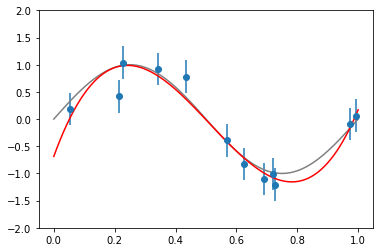

In [33]:
M=3 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
print('w_MLE = ',w_MLE.reshape(-1,1))

pred_arr=pred(xs,w_MLE)

#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.ylim(-2,2)
plt.show()

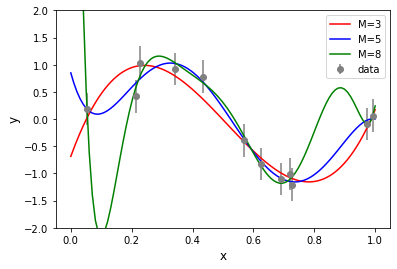

In [10]:
M=3 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE_a=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
pred_arr_a=pred(xs,w_MLE_a)

M=5 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))
    
w_MLE_b=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
pred_arr_b=pred(xs,w_MLE_b)


M=8 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))
    
w_MLE_c=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
pred_arr_c=pred(xs,w_MLE_c)


plt.errorbar(x,y,yerr=sigma,color='gray',label='data',fmt='o')
#plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr_a,color='red',label='M=3')
plt.plot(xs,pred_arr_b,color='blue',label='M=5')
plt.plot(xs,pred_arr_c,color='green',label='M=8')
plt.ylim(-2,2)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.legend()
plt.show()

fitting a degree 9 polynomial

w_MLE =  [[ 1.04167383e+02]
 [-3.67911720e+03]
 [ 4.43965319e+04]
 [-2.70862935e+05]
 [ 9.64851150e+05]
 [-2.12922495e+06]
 [ 2.95009369e+06]
 [-2.49682671e+06]
 [ 1.17899799e+06]
 [-2.37850184e+05]]


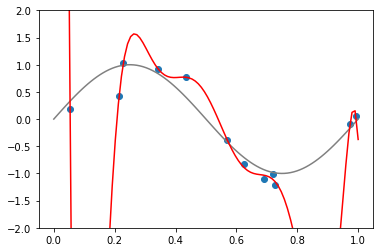

In [34]:
M=9 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
print('w_MLE = ',w_MLE.reshape(-1,1))

pred_arr=pred(xs,w_MLE)

plt.scatter(x,y)
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.ylim(-2,2)
plt.show()

In [29]:
np.linalg.pinv(np.transpose(Phi).dot(Phi))

array([[   3059.24219603,  -17788.39553908,   27575.98801788,
           4234.7072642 ,  -22675.22143242,  -16816.50533768,
          22659.17944289],
       [ -17788.39553908,  104085.42760842, -162538.27153516,
         -24263.66745492,  134346.61624892,   99172.73613783,
        -134513.7340457 ],
       [  27575.98801783, -162538.27153492,  256048.29079345,
          36886.83858674, -212976.57522778, -156329.46434329,
         213757.93300996],
       [   4234.70726419,  -24263.66745485,   36886.83858668,
           6121.41599303,  -29869.81060627,  -22460.41935609,
          29660.66583314],
       [ -22675.22143184,  134346.61624553, -212976.57522273,
         -29869.8106056 ,  177967.49585652,  130093.16797596,
        -178942.49006284],
       [ -16816.50533875,   99172.73614422, -156329.46435361,
         -22460.41935761,  130093.16798764,   95451.23973923,
        -130593.61440435],
       [  22659.17944344, -134513.73404902,  213757.93301552,
          29660.66583399, -17894

checking training error as a function of the order of the polynomial

In [35]:
for m in range(1,10):
    Phi=np.ones(N).reshape((-1,1))
    for h in range(1,m+1):
        Phi=np.hstack((Phi,x**h))
    w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
    # computing error function
    err = np.sum((y-pred(x.flatten(),w_MLE))**2)
    print('M=',m,' error = ',err)

M= 1  error =  4.973068318951922
M= 2  error =  4.377259498511365
M= 3  error =  0.581104718808488
M= 4  error =  0.38805038655651153
M= 5  error =  0.2064341000327291
M= 6  error =  0.19874928957409513
M= 7  error =  0.19538180946406675
M= 8  error =  0.16089216410005167
M= 9  error =  0.02434491051334109


## overfitting control

### training-test procedure

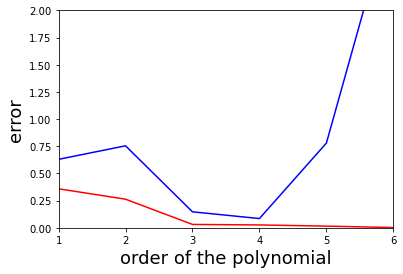

In [36]:
test_size = int(0.4*len(x))
x_test = x[:test_size]
x_train = x[test_size:]
y_test = y[:test_size]
y_train = y[test_size:]

arr_testerr=[]
arr_trainerr=[]
for m in range(1,10):
    Phi=np.ones(len(x_train)).reshape((-1,1))
    for h in range(1,m+1):
        Phi=np.hstack((Phi,x_train**h))
    w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y_train)
    # computing error function
    arr_trainerr.append(np.mean((y_train-pred(x_train.flatten(),w_MLE))**2))
    arr_testerr.append(np.mean((y_test-pred(x_test.flatten(),w_MLE))**2))
    #print('M=',m,' train error = ',arr_trainerr[-1],', test error = ',arr_testerr[-1])

maxis=np.linspace(1,9,9)
plt.plot(maxis,arr_testerr,color='blue')
plt.plot(maxis,arr_trainerr,color='red')
plt.ylim(0,2)
plt.xlim(1,6)
plt.xlabel('order of the polynomial',size=18)
plt.ylabel('error',size=18)
plt.show()

## implement K=5 cross validation above

### regularization procedure (Ridge regression)

In [22]:
M=9 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

alpha=np.exp(-10.)
reg=alpha*np.identity(M+1)
reg[0,0]=0 
w_ridge=np.linalg.inv(np.transpose(Phi).dot(Phi)+reg).dot(np.transpose(Phi)).dot(y)

In [23]:
w_ridge

array([ -0.19082672,   6.11696079,  -2.87645376, -17.73234807,
        -5.12619416,   9.48687818,  14.41992747,   9.80318785,
        -0.59621197, -13.20166452])

In [25]:
np.linalg.det(np.transpose(Phi).dot(Phi)+reg)

3.790893104959981e-25

In [26]:
predridge_arr=pred(xs,w_ridge)

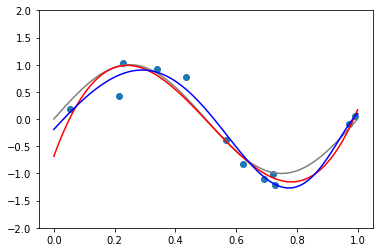

In [27]:
plt.scatter(x,y)
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.plot(xs,predridge_arr,color='blue')
plt.ylim(-2,2)
plt.show()

### sequential Bayesian learning

In [39]:
alpha=1.e-3

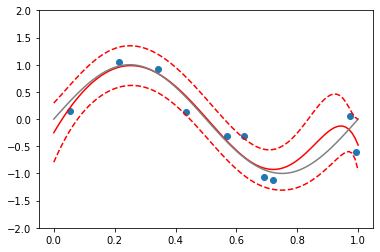

In [38]:
N = 10 # number of points                                                                                                                                                                                   
def func(x):
    return math.sin(2*np.pi*x)

xmin = 0
xmax = 1.
np.random.seed(1231)
x = np.random.rand(N)
yclean = []
for i in range(N):
    yclean.append(func(x[i]) )

mu=0.
sigma=0.3
noise = st.norm.rvs(mu, sigma, size = N)
y = yclean + noise

x=np.array(x).reshape((len(x),1))

M=9 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

beta=(1/sigma)**2
Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi).dot(Phi)
S=np.linalg.inv(Sinv)
def phi(x):
    phi_arr=[]
    for m in range(M+1):
        phi_arr.append(x**m)
    return phi_arr
s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi)).dot(y)

m_arr=[]
mmin_arr=[]
mplu_arr=[]
s2_arr=[]
for xi in xs:
    m_arr.append(m(xi))
    s2_arr.append(s2(xi))
    mmin_arr.append(m(xi)-np.sqrt(s2(xi)))
    mplu_arr.append(m(xi)+np.sqrt(s2(xi)))

plt.plot(xs,m_arr,color='red')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,mmin_arr,color='red',ls='--')
plt.plot(xs,mplu_arr,color='red',ls='--')
plt.scatter(x,y)
plt.ylim(-2,2)
plt.show()

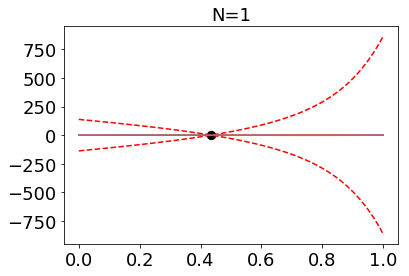

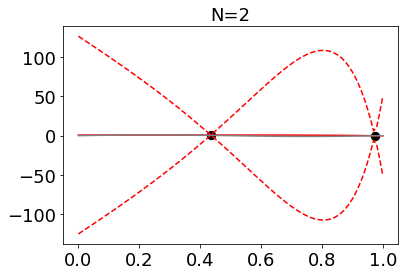

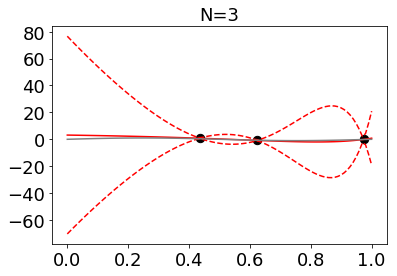

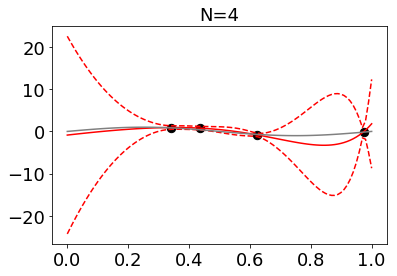

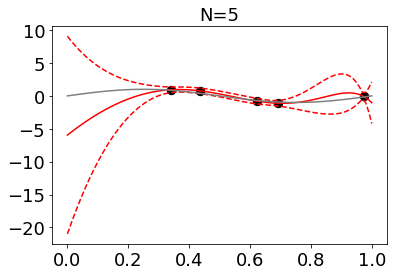

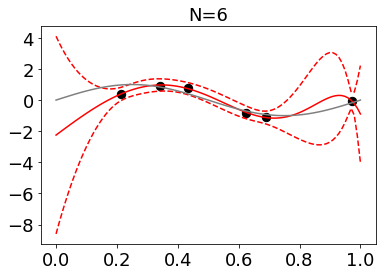

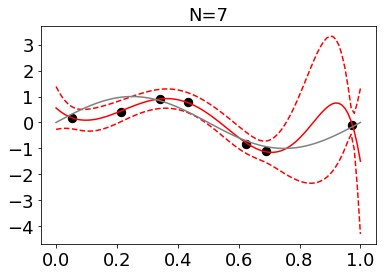

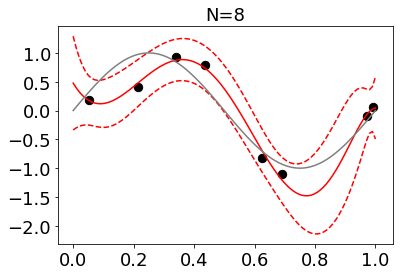

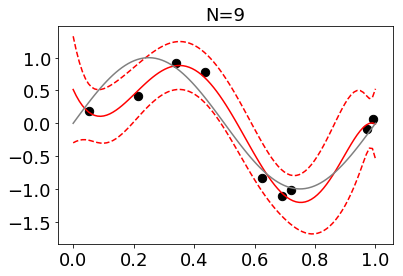

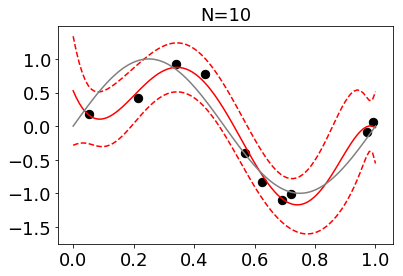

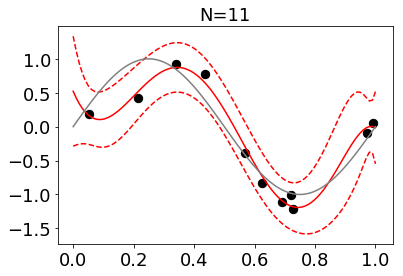

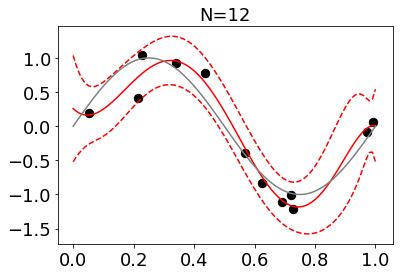

In [8]:
#normal distribution of noise
mu=0.
sigma=0.3

M=9 # degree of the polynomial

alpha=1.e-5  # precision of the prior p(w)

# generating all the data
Nmax=12
np.random.seed(1231)
x_or = np.random.rand(Nmax)
yclean = []
for i in range(Nmax):
    yclean.append(func(x_or[i]) )
noise = st.norm.rvs(mu, sigma, size = Nmax)
y_or = yclean + noise

# sequentially adding data points
for N in range(1,13):
    x=x_or[:N]
    y=y_or[:N]
    
    x=np.array(x).reshape((len(x),1))
    Phi=np.ones(N).reshape((-1,1))
    for h in range(1,M+1):
        Phi=np.hstack((Phi,x**h))

    beta=(1/sigma)**2
    Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi).dot(Phi)
    S=np.linalg.inv(Sinv)
    def phi(x):
        phi_arr=[]
        for m in range(M+1):
            phi_arr.append(x**m)
        return phi_arr

    s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
    m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi)).dot(y)

    m_arr=[]
    mmin_arr=[]
    mplu_arr=[]
    for xi in xs:
        m_arr.append(m(xi))
        mmin_arr.append(m(xi)-np.sqrt(s2(xi)))
        mplu_arr.append(m(xi)+np.sqrt(s2(xi)))

    plt.figure()
    plt.plot(xs,m_arr,color='red')
    plt.plot(xs,mmin_arr,color='red',ls='--')
    plt.plot(xs,mplu_arr,color='red',ls='--')
    plt.scatter(x,y,s=70,color='black')
    plt.plot(xs,func_arr,color='gray')
    plt.title('N='+np.str(N),size=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.ylim(-2,2)
    plt.show()

### comparing predictive distrib. for two models

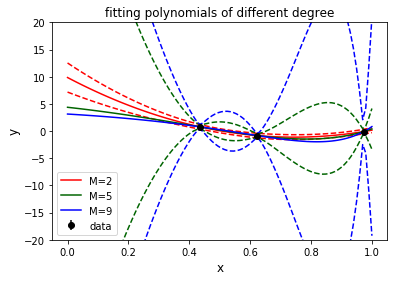

In [27]:
#pick only 3 points
x=x_or[:3]
y=y_or[:3]
x=np.array(x).reshape((len(x),1))
N=len(x)

beta=(1/sigma)**2

M=2
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))


Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi).dot(Phi)
S=np.linalg.inv(Sinv)
def phi(x):
    phi_arr=[]
    for m in range(M+1):
        phi_arr.append(x**m)
    return phi_arr
s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi)).dot(y)

m_arr_1=[]
mmin_arr_1=[]
mplu_arr_1=[]
for xi in xs:
    m_arr_1.append(m(xi))
    mmin_arr_1.append(m(xi)-np.sqrt(s2(xi)))
    mplu_arr_1.append(m(xi)+np.sqrt(s2(xi)))


M=5
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))


Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi).dot(Phi)
S=np.linalg.inv(Sinv)
def phi(x):
    phi_arr=[]
    for m in range(M+1):
        phi_arr.append(x**m)
    return phi_arr
s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi)).dot(y)

m_arr_2=[]
mmin_arr_2=[]
mplu_arr_2=[]
for xi in xs:
    m_arr_2.append(m(xi))
    mmin_arr_2.append(m(xi)-np.sqrt(s2(xi)))
    mplu_arr_2.append(m(xi)+np.sqrt(s2(xi)))


M=9
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))


Sinv=alpha*np.identity(M+1)+beta*np.transpose(Phi).dot(Phi)
S=np.linalg.inv(Sinv)
def phi(x):
    phi_arr=[]
    for m in range(M+1):
        phi_arr.append(x**m)
    return phi_arr
s2 = lambda x: 1/beta + np.transpose(phi(x)).dot(S).dot(phi(x))
m = lambda x: beta*np.transpose(phi(x)).dot(S).dot(np.transpose(Phi)).dot(y)

m_arr_3=[]
mmin_arr_3=[]
mplu_arr_3=[]
for xi in xs:
    m_arr_3.append(m(xi))
    mmin_arr_3.append(m(xi)-np.sqrt(s2(xi)))
    mplu_arr_3.append(m(xi)+np.sqrt(s2(xi)))
    
plt.figure()
plt.errorbar(x,y,yerr=sigma,color='black',label='data',fmt='o')

plt.plot(xs,m_arr_1,color='red',label='M=2')
plt.plot(xs,mmin_arr_1,color='red',ls='--')
plt.plot(xs,mplu_arr_1,color='red',ls='--')

plt.plot(xs,m_arr_2,color='darkgreen',label='M=5')
plt.plot(xs,mmin_arr_2,color='darkgreen',ls='--')
plt.plot(xs,mplu_arr_2,color='darkgreen',ls='--')

plt.plot(xs,m_arr_3,color='blue',label='M=9')
plt.plot(xs,mmin_arr_3,color='blue',ls='--')
plt.plot(xs,mplu_arr_3,color='blue',ls='--')

plt.ylim(-20,20)
plt.title('fitting polynomials of different degree')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.legend()
plt.show()

In [15]:
Xtrain = np.array([-4,-3,-2,-1,1,3])
Xtrain

array([-4, -3, -2, -1,  1,  3])

In [16]:
np.random.shuffle(Xtrain)
Xtrain

array([ 3, -1, -2,  1, -4, -3])

In [10]:
Xtrain

array([ 1, -3, -2, -4, -1,  3])

In [17]:
st.norm.rvs(0, 0.1, size = 5)

array([ 0.07607763,  0.05181328,  0.0453041 ,  0.01992955, -0.05080826])

In [20]:
mat=[[3,4],[5,6]]
mat+3*np.identity(2)

array([[6., 4.],
       [5., 9.]])